In [83]:
import re
import string
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [75]:
twits = pd.read_csv("twitter.csv")
twits

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [76]:
def clean_text(text): 
    text = str(text)
    text = text.lower()
    text = re.sub("\d", " ", text)
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    stop_words = stopwords.words("english")
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [77]:
twits['Text'] = [clean_text(twit) for twit in twits['Text']]
twits

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands murder
...,...,...,...,...
74677,9200,Nvidia,Positive,realized windows partition mac like years behi...
74678,9200,Nvidia,Positive,realized mac window partition years behind nvi...
74679,9200,Nvidia,Positive,realized windows partition mac years behind nv...
74680,9200,Nvidia,Positive,realized windows partition mac like years behi...


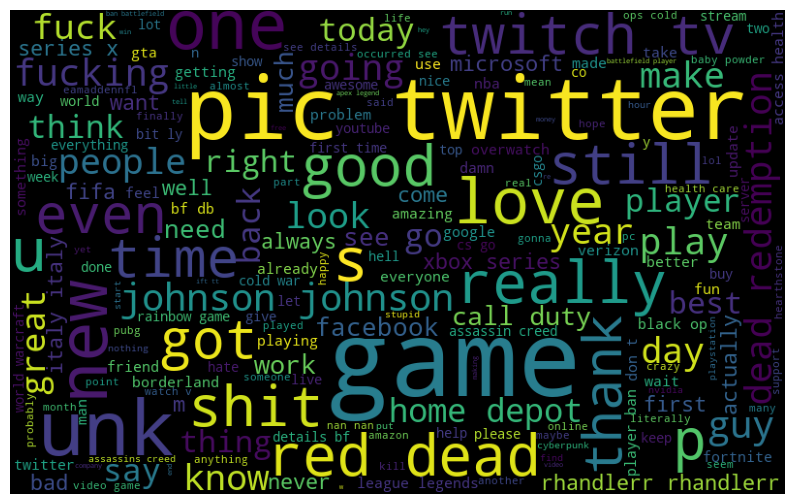

In [79]:
words = ' '.join([text for text in twits["Text"]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off')
plt.show()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(twits["Text"], twits["Sentiment"], test_size=0.30)
tfidf_vectorizer = TfidfVectorizer(max_df=1000, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=400).fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

  Irrelevant       0.70      0.50      0.58      3948
    Negative       0.70      0.74      0.72      6726
     Neutral       0.67      0.62      0.65      5519
    Positive       0.63      0.73      0.68      6212

    accuracy                           0.67     22405
   macro avg       0.67      0.65      0.66     22405
weighted avg       0.67      0.67      0.66     22405

